## Import the Labarays

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import xgboost as xgb

## Lode The Dataset

In [4]:
df = pd.read_csv(r"D:\Winter_Arc_Projects\Telecom-Customer-Churn-Prediction\NoteBook\telecom_customer_churn.csv", encoding='utf-8')

In [5]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


# Understand the Dataset 🔍
* Check basic details.

* Check for missing values.

In [6]:
from colorama import Fore, Style

# Print the shape of the dataframe (number of rows and columns)
print(Fore.CYAN + "df shape: " + Style.RESET_ALL)
print(f"{df.shape}\n")

# Print basic information about the dataframe (column names, data types, non-null values)
print(Fore.GREEN + "df info: " + Style.RESET_ALL)
print(f"{df.info()}\n") 

# Print the count of missing (NaN) values in each column
print(Fore.YELLOW + "df isnull sum: " + Style.RESET_ALL)
print(f"{df.isnull().mean()}\n")

# Print summary statistics for numerical columns (count, mean, std, min, max, etc.)
print(Fore.MAGENTA + "df describe: " + Style.RESET_ALL)
print(f"{df.describe()}\n")

df shape: 
(7043, 38)

df info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                  

In [7]:
# define the numerical and categorical columns
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns
categorical_cols = df.select_dtypes(include=["object","bool"]).columns

print(f" We have features: {len(numerical_cols)} numerical features {numerical_cols}")
print("-"*150)
print(f" We have features: {len(categorical_cols)} categorical features {categorical_cols}")

 We have features: 15 numerical features Index(['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------------------------------------
 We have features: 23 categorical features Index(['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Customer Status', '

In [10]:
# Drop unnecessary columns
df = df.drop(columns = [
    'Customer ID', 'City', 'Zip Code', 'Latitude', 'Longitude',
    'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges',
    'Total Revenue', 'Churn Category', 'Churn Reason'
])

* Row labels attributed to customers who 'Joined' will not be included for model

In [11]:
# Drop rows where "Customer Status" is "Joined"
df = df[df["Customer Status"] != "Joined"]

## Fill the missing values

In [12]:
# fill the missing values
df["Offer"].fillna("missing", inplace=True)

df["Internet Type"].fillna("missing", inplace=True)

df["Avg Monthly Long Distance Charges"].fillna(df["Avg Monthly Long Distance Charges"].median(), inplace=True)

df["Multiple Lines"].fillna(df["Multiple Lines"].mode()[0], inplace=True)

df["Avg Monthly GB Download"].fillna(df["Avg Monthly GB Download"].median(), inplace=True)

df["Online Security"].fillna(df["Online Security"].mode()[0], inplace=True)

df["Online Backup"].fillna(df["Online Backup"].mode()[0], inplace=True)

df["Device Protection Plan"].fillna(df["Device Protection Plan"].mode()[0], inplace=True)

df["Premium Tech Support"].fillna(df["Premium Tech Support"].mode()[0], inplace=True)

df["Streaming TV"].fillna(df["Streaming TV"].mode()[0], inplace=True)

df["Streaming Movies"].fillna(df["Streaming Movies"].mode()[0], inplace=True)

df["Streaming Music"].fillna(df["Streaming Music"].mode()[0], inplace=True)

df["Unlimited Data"].fillna(df["Unlimited Data"].mode()[0], inplace=True)

In [14]:
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns
categorical_cols = df.select_dtypes(include=["object","bool"]).columns


## Preprocessing

In [15]:
def encode_categorical(df):
    """
    Encode all categorical (object/bool) columns in the dataframe using LabelEncoder.
    """
    # Select categorical columns
    categorical_cols = df.select_dtypes(include=["object", "bool"]).columns
    encoder = LabelEncoder()
    # Iterate through selected columns and encode them
    for col in categorical_cols:
        df[col] = encoder.fit_transform(df[col].astype(str))
    return df

df = encode_categorical(df)

In [20]:
# Separate features (X) and target (y)
X = df.drop(columns = ["Customer Status"])
y = df["Customer Status"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

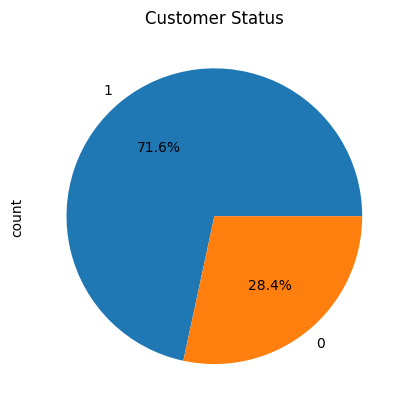

In [21]:
y.value_counts().plot(kind = "pie", autopct = "%1.1f%%")
plt.title("Customer Status")
plt.show()

* Our data is imbalanced

In [22]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

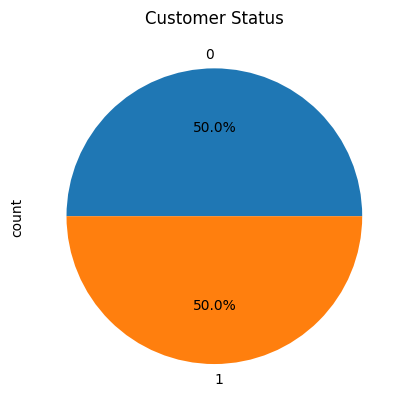

In [23]:
y_resampled.value_counts().plot(kind = "pie", autopct = "%1.1f%%")
plt.title("Customer Status")
plt.show()

## ML models

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd

# ------------------------------------------------------
# Define Models
# ------------------------------------------------------
model = {
    "Decision Tree" : DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=4, min_samples_split=2),
    "RandomForest"  : RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=2, random_state=42),
    "XGBoost"       : XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "CatBoost"      : CatBoostClassifier(iterations=200, learning_rate=0.1, depth=5, random_seed=42, verbose=False),
}

# ------------------------------------------------------
# DataFrame to store results
# ------------------------------------------------------
model_results = pd.DataFrame(columns=[
    'Model',
    'Train Precision', 'Train Recall', 'Train F1',
    'Test Precision', 'Test Recall', 'Test F1',
    'CV F1-score'
])

# ------------------------------------------------------
# Training & Evaluation
# ------------------------------------------------------
for name, mdl in model.items():
    mdl.fit(X_resampled, y_resampled)

    # Predictions
    y_train_pred = mdl.predict(X_resampled)
    y_test_pred = mdl.predict(X_test)

    # Precision, Recall, F1 (weighted for multi-class support)
    train_precision = precision_score(y_resampled, y_train_pred, average='weighted')
    train_recall    = recall_score(y_resampled, y_train_pred, average='weighted')
    train_f1        = f1_score(y_resampled, y_train_pred, average='weighted')

    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall    = recall_score(y_test, y_test_pred, average='weighted')
    test_f1        = f1_score(y_test, y_test_pred, average='weighted')

    # Cross-validation F1-score
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(mdl, X, y, cv=skf, scoring="f1_weighted")
    cv_f1 = cv_scores.mean()

    # Print metrics
    print(f"--- {name} ---")
    print(f"Train Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
    print(f"Test Precision:  {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")
    print(f"CV F1-score:     {cv_f1:.4f} (+/- {cv_scores.std():.4f})")
    print("-" * 60)

    # Store results
    model_results.loc[len(model_results)] = [
        name,
        train_precision, train_recall, train_f1,
        test_precision, test_recall, test_f1,
        cv_f1
    ]

# ------------------------------------------------------
# Display final summary table
# ------------------------------------------------------
display(model_results)


--- Decision Tree ---
Train Precision: 0.8942, Recall: 0.8940, F1: 0.8940
Test Precision:  0.8425, Recall: 0.8240, F1: 0.8289
CV F1-score:     0.8489 (+/- 0.0044)
------------------------------------------------------------
--- RandomForest ---
Train Precision: 0.9082, Recall: 0.9081, F1: 0.9081
Test Precision:  0.8677, Recall: 0.8536, F1: 0.8573
CV F1-score:     0.8705 (+/- 0.0051)
------------------------------------------------------------
--- XGBoost ---
Train Precision: 0.9993, Recall: 0.9993, F1: 0.9993
Test Precision:  0.8331, Recall: 0.7974, F1: 0.8051
CV F1-score:     0.8659 (+/- 0.0076)
------------------------------------------------------------
--- CatBoost ---
Train Precision: 0.9342, Recall: 0.9341, F1: 0.9340
Test Precision:  0.8643, Recall: 0.8483, F1: 0.8523
CV F1-score:     0.8724 (+/- 0.0036)
------------------------------------------------------------


,Model,Train Precision,Train Recall,Train F1,Test Precision,Test Recall,Test F1,CV F1-score
0,Decision Tree,0.894205,0.894011,0.893998,0.842496,0.823976,0.828937,0.848876
1,RandomForest,0.908158,0.908143,0.908142,0.867682,0.853566,0.857253,0.870518
2,XGBoost,0.999328,0.999327,0.999327,0.833134,0.797420,0.805145,0.865907
3,CatBoost,0.934228,0.934051,0.934044,0.864254,0.848255,0.852326,0.872427


### GridSeearchCV on the Catboost model

In [ ]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# # --- Base model ---
# cat_model = CatBoostClassifier(
#     loss_function='Logloss',
#     eval_metric='F1',
#     task_type='GPU',        # ⚡ GPU support
#     random_seed=42,
#     verbose=False
# )

# # --- Parameter grid (start small, expand later) ---
# param_grid = {
#     'depth': [4, 6, 8],
#     'learning_rate': [0.01, 0.03, 0.05],
#     'l2_leaf_reg': [3, 5, 7, 9],
#     'iterations': [500, 800, 1000],
#     'bagging_temperature': [0.5, 1.0],
#     'border_count': [128, 254]
# }

# # --- Cross-validation setup ---
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # --- Grid Search ---
# grid_search = GridSearchCV(
#     estimator=cat_model,
#     param_grid=param_grid,
#     scoring='f1',             # or 'accuracy'
#     cv=skf,
#     verbose=2,
#     n_jobs=-1
# )

# # --- Fit the model ---
# grid_search.fit(X_resampled, y_resampled)

# # --- Best parameters and score ---
# print("\nBest Parameters:", grid_search.best_params_)
# print(f"Best CV F1 Score: {grid_search.best_score_:.4f}")

# # --- Evaluate on test set ---
# best_cat = grid_search.best_estimator_
# y_pred = best_cat.predict(X_test)

# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# test_acc = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {test_acc:.4f}")

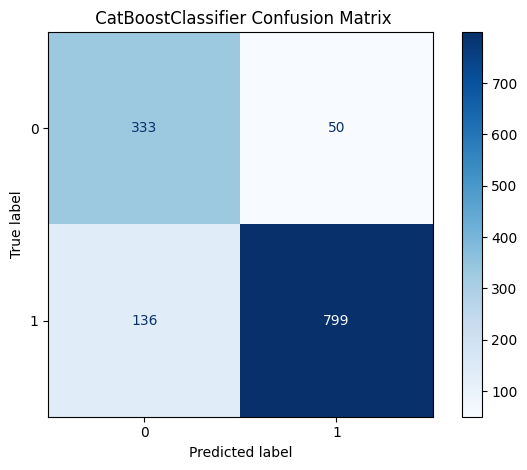


✅ CatBoost CV Accuracy: 0.87798 (+/- 0.00342)


In [25]:
# Define theCatBoostClassifier
cat_model = CatBoostClassifier(
    iterations=500,         # reduce iterations to avoid memorizing data
    learning_rate=0.03,      # smaller learning rate → smoother learning
    depth=4,                 # control model complexity
    l2_leaf_reg=5,           # stronger regularization
    bagging_temperature = 0.5,
    border_count = 128,
    random_seed=42,
    loss_function='Logloss',
    verbose=False,
    # task_type='GPU'          # if you have GPU
)

# Fit the model
cat_model.fit(X_resampled, y_resampled)

# Predict on the training set
y_pred = cat_model.predict(X_test)

# Set up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using cross_val_score
scores = cross_val_score(cat_model, X, y, cv=skf, scoring="accuracy")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = cat_model.classes_)
disp.plot(cmap='Blues')
plt.title(" CatBoostClassifier Confusion Matrix")
plt.tight_layout()
plt.show()

print(f"\n✅ CatBoost CV Accuracy: {scores.mean():.5f} (+/- {scores.std():.5f})")